In [2]:
import chess
import chess.engine
import time
import chess.svg
from IPython.display import SVG, display

# Set up stockfish path here
STOCKFISH_PATH = "/usr/bin/stockfish"  # <-- Update this
fen = "2kr3r/ppp1bpp1/2n1p2p/3P3q/2P4P/3Q1N2/PP3PP1/R1B1R1K1 w - - 1 15"

## MINIMAX

In [3]:
engine = chess.engine.SimpleEngine.popen_uci(STOCKFISH_PATH)

class TreeNode:
    def __init__(self, board, move=None, score=None):
        self.board = board
        self.move = move
        self.score = score  # Score from Stockfish
        self.children = []

def evaluate_board(board, time_limit=0.1):
    result = engine.analyse(board, chess.engine.Limit(time=time_limit))
    return result['score'].white().score(mate_score=10000)

def build_tree(node, depth):
    if depth == 0 or node.board.is_game_over():
        node.score = evaluate_board(node.board)
        return

    legal_moves = list(node.board.legal_moves)
    for move in legal_moves:
        child_board = node.board.copy()
        child_board.push(move)
        child_node = TreeNode(child_board, move)
        node.children.append(child_node)
        build_tree(child_node, depth - 1)

def minimax(node, is_maximizing):
    if not node.children:
        return node.score

    if is_maximizing:
        max_eval = float('-inf')
        for child in node.children:
            eval = minimax(child, False)
            max_eval = max(max_eval, eval)
        node.score = max_eval
        return max_eval
    else:
        min_eval = float('inf')
        for child in node.children:
            eval = minimax(child, True)
            min_eval = min(min_eval, eval)
        node.score = min_eval
        return min_eval


In [4]:
# Example: FEN for a middle-game position
board = chess.Board(fen)
root = TreeNode(board)
depth = 2

In [5]:
# Time measurement starts here
start_time = time.time()

build_tree(root, depth)
minimax_score = minimax(root, is_maximizing=True)

end_time = time.time()
minimax_time = end_time - start_time

print(f"Minimax Evaluation of Root: {minimax_score}")
print(f"Minimax Computation Time: {minimax_time:.2f} seconds")


Minimax Evaluation of Root: 58
Minimax Computation Time: 199.24 seconds


In [6]:
# Show best move at root
best_move = None
best_score = float('-inf')
for child in root.children:
    if child.score > best_score:
        best_score = child.score
        best_move = child.move

print(f"Best Move According to Minimax: {best_move}")

Best Move According to Minimax: c1f4


SVG board with best move saved as 'minimax_board.svg'


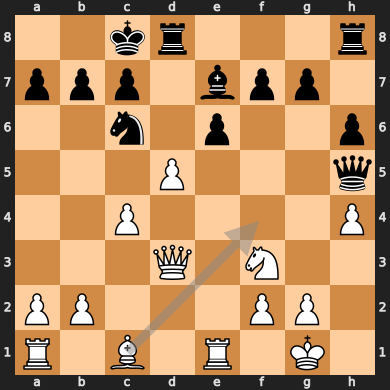

In [7]:
# Generate SVG for the root board with best move arrow
def show_board_svg(board, best_move=None):
    svg_board = chess.svg.board(board=board, arrows=[(best_move.from_square, best_move.to_square)] if best_move else [])
    return svg_board

# Show board with best move highlighted
svg_output = show_board_svg(board, best_move)
with open("minimax_board.svg", "w") as f:
    f.write(svg_output)

print("SVG board with best move saved as 'minimax_board.svg'")

display(SVG(svg_output))

## AlphaBeta Pruning

In [8]:
engine = chess.engine.SimpleEngine.popen_uci(STOCKFISH_PATH)

class TreeNode:
    def __init__(self, board, move=None, score=None):
        self.board = board
        self.move = move
        self.score = score  # Score from Stockfish
        self.children = []

def evaluate_board(board, time_limit=0.1):
    result = engine.analyse(board, chess.engine.Limit(time=time_limit))
    return result['score'].white().score(mate_score=10000)

def build_tree(node, depth):
    if depth == 0 or node.board.is_game_over():
        node.score = evaluate_board(node.board)
        return

    legal_moves = list(node.board.legal_moves)
    for move in legal_moves:
        child_board = node.board.copy()
        child_board.push(move)
        child_node = TreeNode(child_board, move)
        node.children.append(child_node)
        build_tree(child_node, depth - 1)

def alphabeta(node, depth, alpha, beta, is_maximizing):
    if depth == 0 or not node.children:
        if node.score is None:
            node.score = evaluate_board(node.board)
        return node.score

    if is_maximizing:
        max_eval = float('-inf')
        for child in node.children:
            eval = alphabeta(child, depth - 1, alpha, beta, False)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break  # 🪓 Prune
        node.score = max_eval
        return max_eval

    else:
        min_eval = float('inf')
        for child in node.children:
            eval = alphabeta(child, depth - 1, alpha, beta, True)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break  # 🪓 Prune
        node.score = min_eval
        return min_eval


In [9]:
# Example: FEN for a middle-game position
board = chess.Board(fen)
root = TreeNode(board)
depth = 2

In [10]:
# Time measurement starts here
start_time = time.time()

build_tree(root, depth)
minimax_score = alphabeta(root, depth, alpha=float('-inf'), beta=float('inf'), is_maximizing=True)

end_time = time.time()
AlphaBetaPruning_time = end_time - start_time

print(f"Minimax Evaluation of Root: {minimax_score}")
print(f"AplhaBetaPruning Computation Time: {AlphaBetaPruning_time:.2f} seconds")

Minimax Evaluation of Root: 52
AplhaBetaPruning Computation Time: 199.32 seconds


In [11]:
# Show best move at root
best_move = None
best_score = float('-inf')
for child in root.children:
    if child.score > best_score:
        best_score = child.score
        best_move = child.move

print(f"Best Move According to AlphaBetaPruning: {best_move}")

Best Move According to AlphaBetaPruning: c1f4


SVG board with best move saved as 'alphabeta_pruning_board.svg'


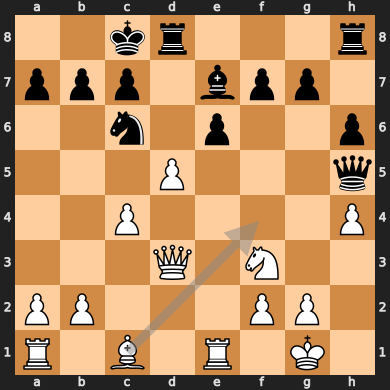

In [12]:
# Generate SVG for the root board with best move arrow
def show_board_svg(board, best_move=None):
    svg_board = chess.svg.board(board=board, arrows=[(best_move.from_square, best_move.to_square)] if best_move else [])
    return svg_board

# Show board with best move highlighted
svg_output = show_board_svg(board, best_move)
with open("alphaBeta_board.svg", "w") as f:
    f.write(svg_output)

print("SVG board with best move saved as 'alphabeta_pruning_board.svg'")

display(SVG(svg_output))

## Minimax with K-Ply

In [13]:
engine = chess.engine.SimpleEngine.popen_uci(STOCKFISH_PATH)

def minimax(board, depth, alpha, beta, maximizing):
    if depth == 0 or board.is_game_over():
        # Evaluate with stockfish at leaf node
        info = engine.analyse(board, chess.engine.Limit(depth=10))
        return info["score"].white().score(mate_score=10000)  # centipawn score

    if maximizing:
        max_eval = float('-inf')
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, False)
            board.pop()
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break  # beta cut-off
        return max_eval
    else:
        min_eval = float('inf')
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, True)
            board.pop()
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break  # alpha cut-off
        return min_eval

def k_ply_search(fen, k):
    board = chess.Board(fen)
    best_score = float('-inf')
    best_move = None

    start_time = time.time()

    for move in board.legal_moves:
        board.push(move)
        score = minimax(board, k - 1, float('-inf'), float('inf'), False)
        board.pop()
        if score > best_score:
            best_score = score
            best_move = move

    end_time = time.time()
    Minimax_K_ply_time = end_time - start_time

    print(f"\nBest move at depth {k}: {best_move}, eval: {best_score}")
    print(f"Minimax_K_ply_time : {Minimax_K_ply_time:.2f} seconds")

    return best_move, Minimax_K_ply_time  # 👈 return time also

# Usage
best_move, Minimax_K_ply_time = k_ply_search(fen, k=2)
engine.quit()


Best move at depth 2: c1f4, eval: 48
Minimax_K_ply_time : 12.06 seconds


SVG board with best move saved as 'Minimax_K_ply_board.svg'


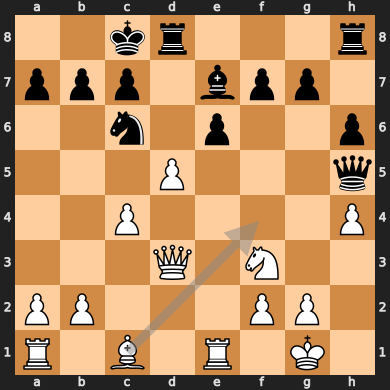

In [14]:
# Generate SVG for the root board with best move arrow
def show_board_svg(board, best_move=None):
    svg_board = chess.svg.board(board=board, arrows=[(best_move.from_square, best_move.to_square)] if best_move else [])
    return svg_board

# Show board with best move highlighted
board = chess.Board(fen)
svg_output = show_board_svg(board, best_move)
with open("Minimax_K_ply_board.svg", "w") as f:
    f.write(svg_output)

print("SVG board with best move saved as 'Minimax_K_ply_board.svg'")

display(SVG(svg_output))

## AlphaBeta Pruning with K-Ply

In [15]:
import chess
import chess.engine
import time

# Configure your Stockfish path here
STOCKFISH_PATH = "/usr/bin/stockfish"   # Example: "C:/Engines/stockfish.exe"
engine = chess.engine.SimpleEngine.popen_uci(STOCKFISH_PATH)

def evaluate_position(board):
    """Evaluate the board using Stockfish at leaf node."""
    info = engine.analyse(board, chess.engine.Limit(depth=1))
    score = info["score"].white().score(mate_score=100000)
    return score

def minimax(board, depth, alpha, beta, maximizing):
    """Minimax with Alpha-Beta Pruning."""
    if depth == 0 or board.is_game_over():
        return evaluate_position(board)

    if maximizing:
        max_eval = float('-inf')
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, False)
            board.pop()
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break  # β cutoff
        return max_eval
    else:
        min_eval = float('inf')
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, True)
            board.pop()
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break  # α cutoff
        return min_eval

def k_ply_search_with_alpha_beta(fen, k):
    """Top-level search to find best move using K-ply + Alpha-Beta pruning."""
    board = chess.Board(fen)
    best_score = float('-inf')
    best_move = None

    start_time = time.time()  # Start timing

    for move in board.legal_moves:
        board.push(move)
        score = minimax(board, k - 1, float('-inf'), float('inf'), False)
        board.pop()
        if score > best_score:
            best_score = score
            best_move = move

    end_time = time.time()  # End timing
    alphaBeta_K_ply_time = end_time - start_time

    print(f"\n✅ Best Move at {k}-ply: {best_move} with score {best_score}")
    print(f"⏱️ Alpha-Beta K-ply Time: {alphaBeta_K_ply_time:.2f} seconds")
    
    return best_move, alphaBeta_K_ply_time 

best_move, alphaBeta_K_ply_time = k_ply_search_with_alpha_beta(fen, k=2)
engine.quit()


✅ Best Move at 2-ply: c1f4 with score -26
⏱️ Alpha-Beta K-ply Time: 0.99 seconds


SVG board with best move saved as 'aplhaBeta_K_ply_board.svg'


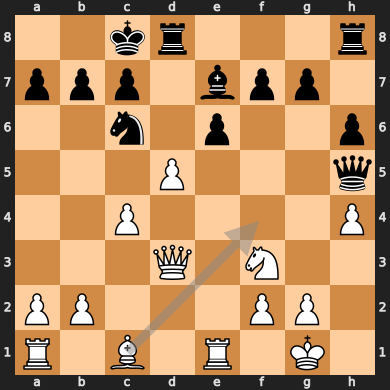

In [16]:
# Generate SVG for the root board with best move arrow
def show_board_svg(board, best_move=None):
    svg_board = chess.svg.board(board=board, arrows=[(best_move.from_square, best_move.to_square)] if best_move else [])
    return svg_board

# Show board with best move highlighted
board = chess.Board(fen)
svg_output = show_board_svg(board, best_move)
with open("aplhaBeta_K_ply_board.svg", "w") as f:
    f.write(svg_output)

print("SVG board with best move saved as 'aplhaBeta_K_ply_board.svg'")

display(SVG(svg_output))

## Comparision Minimax vs AlphaBetaPruning in 3-ply search

/tmp/ipykernel_26853/1431548096.py:159: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/chicku/anaconda3/envs/chess_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


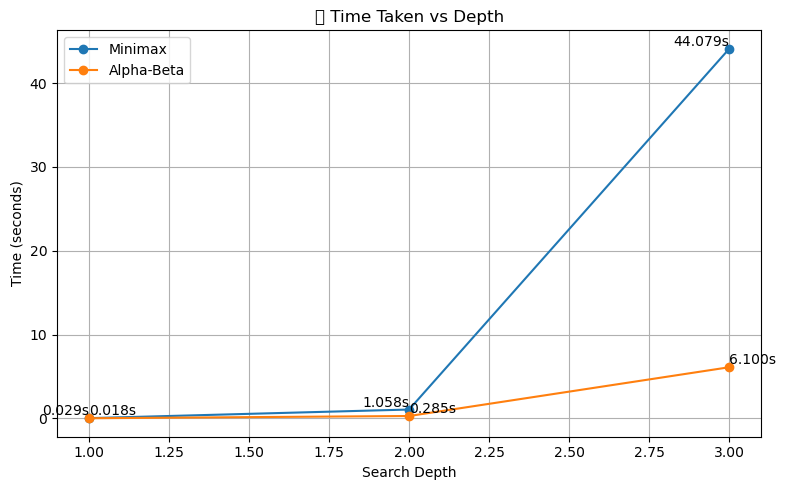

/tmp/ipykernel_26853/1431548096.py:178: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/chicku/anaconda3/envs/chess_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


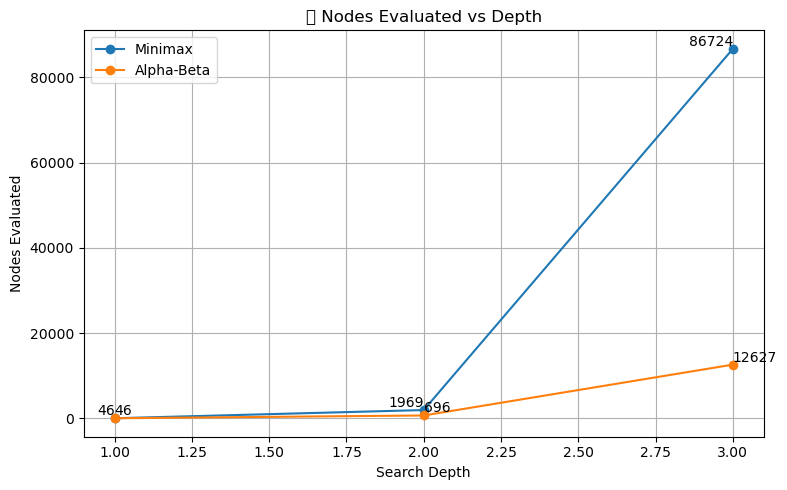

/tmp/ipykernel_26853/1431548096.py:195: UserWarning: Glyph 129683 (\N{AXE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/chicku/anaconda3/envs/chess_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129683 (\N{AXE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


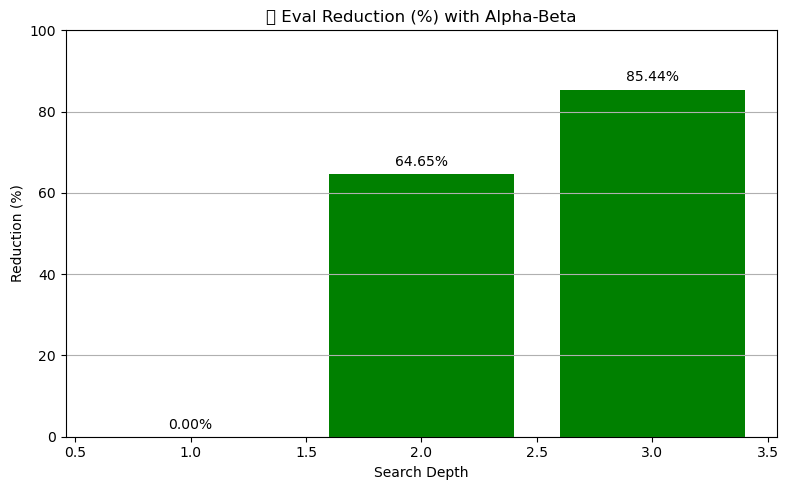

In [17]:
import matplotlib.pyplot as plt
import chess
import chess.engine
import time

# Path to your Stockfish binary
STOCKFISH_PATH = "/usr/bin/stockfish"  # Update this path if needed

# Initialize engine
engine = chess.engine.SimpleEngine.popen_uci(STOCKFISH_PATH)

# Global counters
eval_counter_minimax = 0
eval_counter_alphabeta = 0

def evaluate(board):
    """Fast evaluation using Stockfish at shallow depth."""
    info = engine.analyse(board, chess.engine.Limit(depth=2))
    return info["score"].white().score(mate_score=100000)

def minimax(board, depth, maximizing):
    global eval_counter_minimax
    if depth == 0 or board.is_game_over():
        eval_counter_minimax += 1
        return evaluate(board), None

    best_move = None
    if maximizing:
        max_eval = float('-inf')
        for move in board.legal_moves:
            board.push(move)
            eval, _ = minimax(board, depth - 1, False)
            board.pop()
            if eval > max_eval:
                max_eval = eval
                best_move = move
        return max_eval, best_move
    else:
        min_eval = float('inf')
        for move in board.legal_moves:
            board.push(move)
            eval, _ = minimax(board, depth - 1, True)
            board.pop()
            if eval < min_eval:
                min_eval = eval
                best_move = move
        return min_eval, best_move

def alphabeta(board, depth, alpha, beta, maximizing):
    global eval_counter_alphabeta
    if depth == 0 or board.is_game_over():
        eval_counter_alphabeta += 1
        return evaluate(board), None

    best_move = None
    if maximizing:
        max_eval = float('-inf')
        for move in board.legal_moves:
            board.push(move)
            eval, _ = alphabeta(board, depth - 1, alpha, beta, False)
            board.pop()
            if eval > max_eval:
                max_eval = eval
                best_move = move
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval, best_move
    else:
        min_eval = float('inf')
        for move in board.legal_moves:
            board.push(move)
            eval, _ = alphabeta(board, depth - 1, alpha, beta, True)
            board.pop()
            if eval < min_eval:
                min_eval = eval
                best_move = move
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval, best_move

# Modified performance test function that returns the data in a format we can use
def test_performance(fen, depths):
    board = chess.Board(fen)
    
    minimax_results = []
    alphabeta_results = []
    
    for depth in depths:
        # Minimax
        global eval_counter_minimax
        eval_counter_minimax = 0
        start = time.time()
        eval_minimax, best_move_minimax = minimax(board, depth, True)
        end = time.time()
        time_minimax = end - start
        
        # Alpha-Beta Pruning
        global eval_counter_alphabeta
        eval_counter_alphabeta = 0
        start = time.time()
        eval_ab, best_move_ab = alphabeta(board, depth, float('-inf'), float('inf'), True)
        end = time.time()
        time_ab = end - start
        
        minimax_results.append({
            "depth": depth,
            "time": time_minimax,
            "nodes": eval_counter_minimax,
            "best_move": best_move_minimax,
            "eval": eval_minimax
        })
        
        alphabeta_results.append({
            "depth": depth,
            "time": time_ab,
            "nodes": eval_counter_alphabeta,
            "best_move": best_move_ab,
            "eval": eval_ab
        })

    return minimax_results, alphabeta_results

# Function to generate the plots based on the results
def generate_plots(minimax_results, alphabeta_results):
    depths = [result["depth"] for result in minimax_results]
    
    # Minimax and Alpha-Beta Time
    minimax_time = [result["time"] for result in minimax_results]
    alphabeta_time = [result["time"] for result in alphabeta_results]

    # Minimax and Alpha-Beta Nodes Evaluated
    minimax_nodes = [result["nodes"] for result in minimax_results]
    alphabeta_nodes = [result["nodes"] for result in alphabeta_results]

    # Alpha-Beta Evaluation Reduction
    eval_reduction = [
        100 * (1 - alphabeta_nodes[i] / minimax_nodes[i])
        for i in range(len(depths))
    ]

    # Plot 1: Time vs Depth
    plt.figure(figsize=(8, 5))
    plt.plot(depths, minimax_time, label="Minimax", marker='o')
    plt.plot(depths, alphabeta_time, label="Alpha-Beta", marker='o')
    plt.title("⏱️ Time Taken vs Depth")
    plt.xlabel("Search Depth")
    plt.ylabel("Time (seconds)")
    
    # Add values to each point in the Time vs Depth graph
    for i, txt in enumerate(minimax_time):
        plt.text(depths[i], minimax_time[i], f'{txt:.3f}s', fontsize=10, verticalalignment='bottom', horizontalalignment='right')
    for i, txt in enumerate(alphabeta_time):
        plt.text(depths[i], alphabeta_time[i], f'{txt:.3f}s', fontsize=10, verticalalignment='bottom', horizontalalignment='left')
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot 2: Nodes Evaluated vs Depth
    plt.figure(figsize=(8, 5))
    plt.plot(depths, minimax_nodes, label="Minimax", marker='o')
    plt.plot(depths, alphabeta_nodes, label="Alpha-Beta", marker='o')
    plt.title("🔢 Nodes Evaluated vs Depth")
    plt.xlabel("Search Depth")
    plt.ylabel("Nodes Evaluated")
    
    # Add values to each point in the Nodes Evaluated vs Depth graph
    for i, txt in enumerate(minimax_nodes):
        plt.text(depths[i], minimax_nodes[i], f'{txt}', fontsize=10, verticalalignment='bottom', horizontalalignment='right')
    for i, txt in enumerate(alphabeta_nodes):
        plt.text(depths[i], alphabeta_nodes[i], f'{txt}', fontsize=10, verticalalignment='bottom', horizontalalignment='left')
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot 3: Alpha-Beta Evaluation Reduction (%)
    plt.figure(figsize=(8, 5))
    bars = plt.bar(depths, eval_reduction, color='green')
    plt.title("🪓 Eval Reduction (%) with Alpha-Beta")
    plt.xlabel("Search Depth")
    plt.ylabel("Reduction (%)")
    plt.ylim(0, 100)
    
    # Add values to each bar in the Eval Reduction graph
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, f'{yval:.2f}%', ha='center', fontsize=10)
    
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example FEN (feel free to try others)
fen = "2kr3r/ppp1bpp1/2n1p2p/3P3q/2P4P/3Q1N2/PP3PP1/R1B1R1K1 w - - 1 15"
depths = [1, 2, 3]

# Run the performance test and generate plots
minimax_results, alphabeta_results = test_performance(fen, depths)
generate_plots(minimax_results, alphabeta_results)

# Cleanup
engine.quit()


## Chess Game Playing

In [18]:
import chess
import chess.engine
import chess.pgn
import chess.svg
import time
import cairosvg
import os

# Configure Stockfish path
STOCKFISH_PATH = "/usr/bin/stockfish"
engine = chess.engine.SimpleEngine.popen_uci(STOCKFISH_PATH)

def evaluate_position(board):
    info = engine.analyse(board, chess.engine.Limit(depth=1))
    score = info["score"].white().score(mate_score=100000)
    return score

def minimax(board, depth, alpha, beta, maximizing):
    if depth == 0 or board.is_game_over():
        return evaluate_position(board)

    if maximizing:
        max_eval = float('-inf')
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, False)
            board.pop()
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = float('inf')
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, True)
            board.pop()
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval

def k_ply_search_with_alpha_beta(board, k):
    best_score = float('-inf') if board.turn == chess.WHITE else float('inf')
    best_move = None

    for move in board.legal_moves:
        board.push(move)
        score = minimax(board, k - 1, float('-inf'), float('inf'), not board.turn)
        board.pop()

        if board.turn == chess.WHITE and score > best_score:
            best_score = score
            best_move = move
        elif board.turn == chess.BLACK and score < best_score:
            best_score = score
            best_move = move

    return best_move

def save_board_image(board, move_num, output_folder="frames"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    svg = chess.svg.board(board=board, size=350)
    cairosvg.svg2png(bytestring=svg.encode("utf-8"), write_to=f"{output_folder}/move_{move_num:03}.png")

def create_gif_from_frames(output_folder="frames", gif_name="game.gif", delay=100):
    from PIL import Image
    frames = sorted([f for f in os.listdir(output_folder) if f.endswith(".png")])
    images = [Image.open(os.path.join(output_folder, f)) for f in frames]
    images[0].save(gif_name, save_all=True, append_images=images[1:], duration=delay, loop=0)
    print(f"\n🎞️ GIF saved as {gif_name}")

def get_termination_reason(board):
    if board.is_checkmate():
        return "Checkmate"
    elif board.is_stalemate():
        return "Stalemate"
    elif board.is_insufficient_material():
        return "Insufficient material"
    elif board.can_claim_fifty_moves():
        return "Fifty-move rule"
    elif board.can_claim_threefold_repetition():
        return "Threefold repetition"
    else:
        return "Unknown"

def play_self_game(k=2, max_moves=1000):
    board = chess.Board()
    game = chess.pgn.Game()
    node = game
    move_count = 0

    print("\n🎯 Starting Self-Play Game!\n")
    save_board_image(board, move_count)
    print(board)

    while not board.is_game_over() and move_count < max_moves:
        move = k_ply_search_with_alpha_beta(board, k)
        if move is None:
            break
        board.push(move)
        node = node.add_variation(move)
        move_count += 1
        save_board_image(board, move_count)
        print(f"\nMove {move_count}: {move}")
        print(board)

    print("\n🏁 Game Over!")
    print("📜 Result:", board.result())
    print("📝 Termination:", get_termination_reason(board))

    # Save PGN
    with open("self_play_game.pgn", "w") as f:
        f.write(str(game))
    print("📄 PGN saved as self_play_game.pgn")

    # Save GIF
    create_gif_from_frames()

# Run the game
play_self_game(k=3)

# Cleanup
engine.quit()



🎯 Starting Self-Play Game!

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

Move 1: b1c3
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . N . . . . .
P P P P P P P P
R . B Q K B N R

Move 2: c7c6
r n b q k b n r
p p . p p p p p
. . p . . . . .
. . . . . . . .
. . . . . . . .
. . N . . . . .
P P P P P P P P
R . B Q K B N R

Move 3: g2g3
r n b q k b n r
p p . p p p p p
. . p . . . . .
. . . . . . . .
. . . . . . . .
. . N . . . P .
P P P P P P . P
R . B Q K B N R

Move 4: g7g6
r n b q k b n r
p p . p p p . p
. . p . . . p .
. . . . . . . .
. . . . . . . .
. . N . . . P .
P P P P P P . P
R . B Q K B N R

Move 5: a1b1
r n b q k b n r
p p . p p p . p
. . p . . . p .
. . . . . . . .
. . . . . . . .
. . N . . . P .
P P P P P P . P
. R B Q K B N R

Move 6: b8a6
r . b q k b n r
p p . p p p . p
n . p . . . p .
. . . . . . . .
. . . . . . . .
. . N . . . P .
P P P P P P . P
. R B Q